# < Real Data >
- IC13
- IC15
- IC17
- IC19
- COCO

In [1]:
import os
import glob
import json

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from tqdm import tqdm

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
import torchvision.transforms as transforms
from torchvision.io.image import ImageReadMode

---
---

## 1. 데이터 확인

### (1) 파일 및 라벨 개수 확인

#### IC13

In [2]:
print(len(glob.glob("dataset/IC13/train/*")))
print(len(glob.glob("dataset/IC13/train_gt/*")))
print(len(glob.glob("dataset/IC13/test/*")))
print(len(glob.glob("dataset/IC13/test_gt/*")))

229
229
233
233


In [3]:
sorted(glob.glob("dataset/IC13/train/*"))[:5]

['dataset/IC13/train/100.jpg',
 'dataset/IC13/train/101.jpg',
 'dataset/IC13/train/102.jpg',
 'dataset/IC13/train/103.jpg',
 'dataset/IC13/train/104.jpg']

#### IC15

In [4]:
print(len(glob.glob("dataset/IC15/train/*")))
print(len(glob.glob("dataset/IC15/train_gt/*")))
print(len(glob.glob("dataset/IC15/test/*")))
print(len(glob.glob("dataset/IC15/test_gt/*")))

1000
1000
500
500


In [5]:
sorted(glob.glob("dataset/IC13/train/*"))[:5]

['dataset/IC13/train/100.jpg',
 'dataset/IC13/train/101.jpg',
 'dataset/IC13/train/102.jpg',
 'dataset/IC13/train/103.jpg',
 'dataset/IC13/train/104.jpg']

#### IC17

In [6]:
print(len(glob.glob("dataset/IC17/train/*")))
print(len(glob.glob("dataset/IC17/train_gt/*")))
print(len(glob.glob("dataset/IC17/valid/*")))
print(len(glob.glob("dataset/IC17/valid_gt/*")))
print(len(glob.glob("dataset/IC17/test/*")))

7200
7200
1800
1800
9000


In [7]:
sorted(glob.glob("dataset/IC17/train/*"))[:5]

['dataset/IC17/train/img_1.png',
 'dataset/IC17/train/img_10.jpg',
 'dataset/IC17/train/img_100.jpg',
 'dataset/IC17/train/img_1000.jpg',
 'dataset/IC17/train/img_1001.jpg']

#### IC19

In [8]:
print(len(glob.glob("dataset/IC19/train/*")))
print(len(glob.glob("dataset/IC19/train_gt/*")))
print(len(glob.glob("dataset/IC19/test/*")))

10000
10000
10000


In [9]:
sorted(glob.glob("dataset/IC19/train/*"))[:5]

['dataset/IC19/train/tr_img_00001.jpg',
 'dataset/IC19/train/tr_img_00002.jpg',
 'dataset/IC19/train/tr_img_00003.jpg',
 'dataset/IC19/train/tr_img_00004.jpg',
 'dataset/IC19/train/tr_img_00005.jpg']

#### COCO

In [10]:
print(len(glob.glob("dataset/COCO-Text/train2014/*")))

82783


In [11]:
import json

with open("dataset/COCO-Text/label/cocotext.v2.json") as f:
    my_json = json.load(f)

In [12]:
my_json.keys()

dict_keys(['cats', 'anns', 'imgs', 'imgToAnns', 'info'])

In [13]:
my_json["cats"]

{}

In [14]:
len(list(my_json["anns"].keys()))

201126

In [15]:
list(my_json["anns"].keys())[:5]

['45346', '153036', '125303', '21639', '112792']

---

### (2) 데이터 라벨 형식 확인

#### IC13
- gt구성 : a, b, c, d, Text
- 라벨의 4개의 a,b,c,d 좌표. (a,b) : 좌상단 (c,d) :우하단
- 라벨은 좌상단, 우하단으로 구성됨

In [16]:
with open("dataset/IC13/train_gt/gt_100.txt", "r") as f:
    x = f.readlines()
    print(x)

['158 128 411 181 "Footpath"\n', '443 128 501 169 "To"\n', '64 200 363 243 "Colchester"\n', '394 199 487 239 "and"\n', '72 271 382 312 "Greenstead"\n']


In [17]:
a = x[0].split()
a, b, c, d = map(int, x[0].split()[:-1])

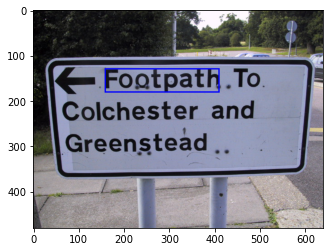

In [18]:
def pil_draw_rect(image, point1, point2):
    draw = ImageDraw.Draw(image)
    draw.rectangle((point1, point2), outline=(0, 0, 255), width=3)
    return image


image = Image.open("dataset/IC13/train/100.jpg")
image = pil_draw_rect(image, (a, b), (c, d))

plt.imshow(np.array(image))
plt.show()

#### IC15
- gt구성 : c1, c2, c3, c4, c5, c6, c7, Text
- 라벨은 8개의 좌표로 구성됨
- (c1,c2) : 좌상단, (c3,c4) : 우상단, (c5,c6) : 우하단, (c7,c8) : 좌하단
- 라벨은 좌상단을 시작으로 시계방향으로 구성됨

In [19]:
with open("dataset/IC15/train_gt/gt_img_100.txt", "r", encoding="utf-8-sig") as f:
    x = f.readlines()
    print(x)

['645,19,686,13,692,43,651,48,Way\n', '689,19,719,13,724,32,694,38,out\n', '519,110,549,93,556,112,526,129,###\n', '549,92,572,80,578,98,555,110,Line\n', '684,172,729,160,734,176,689,188,Platform\n', '730,162,739,159,742,171,733,174,###\n', '744,157,749,154,753,168,748,171,###\n', '759,152,767,150,772,165,764,167,###\n']


In [20]:
c1, c2, c3, c4, c5, c6, c7, c8 = map(int, x[0].split(",")[:-1])

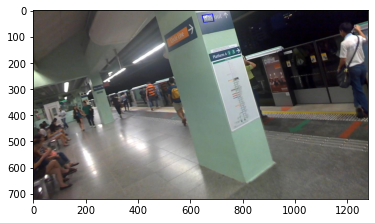

In [21]:
image = Image.open("dataset/IC15/train/img_100.jpg")
draw = ImageDraw.Draw(image)
draw.polygon(((c1, c2), (c3, c4), (c5, c6), (c7, c8)), outline=(0, 0, 255), width=3)
plt.imshow(np.array(image))
plt.show()

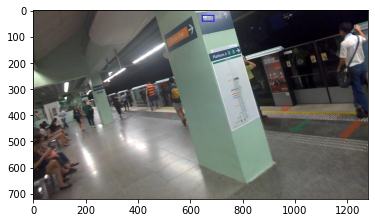

In [22]:
image = Image.open("dataset/IC15/train/img_100.jpg")

image = pil_draw_rect(image, (c1, c2), (c5, c6))
plt.imshow(np.array(image))
plt.show()

#### IC17
- gt구성 : c1, c2, c3, c4, c5, c6, c7, Language ,Text
- 라벨은 8개의 좌표로 구성됨
- (c1,c2) : 좌상단, (c3,c4) : 우상단, (c5,c6) : 우하단, (c7,c8) : 좌하단
- 라벨은 좌상단을 시작으로 시계방향으로 구성됨

In [23]:
with open("dataset/IC17/train_gt/gt_img_100.txt", "r", encoding="utf-8-sig") as f:
    x = f.readlines()
    print(x)

['310,102,427,97,437,166,307,170,Arabic,إسترجل\n', '257,148,299,148,301,156,254,158,Symbols,.....\n', '241,139,252,139,252,168,238,168,Arabic,و\n', '175,132,242,131,233,170,163,174,Arabic,متلبسش\n', '111,137,164,140,163,176,110,171,Arabic,بناتك\n', '39,145,106,146,106,182,36,181,Arabic,!!!محزق\n']


In [24]:
c1, c2, c3, c4, c5, c6, c7, c8 = map(int, x[3].split(",")[:-2])

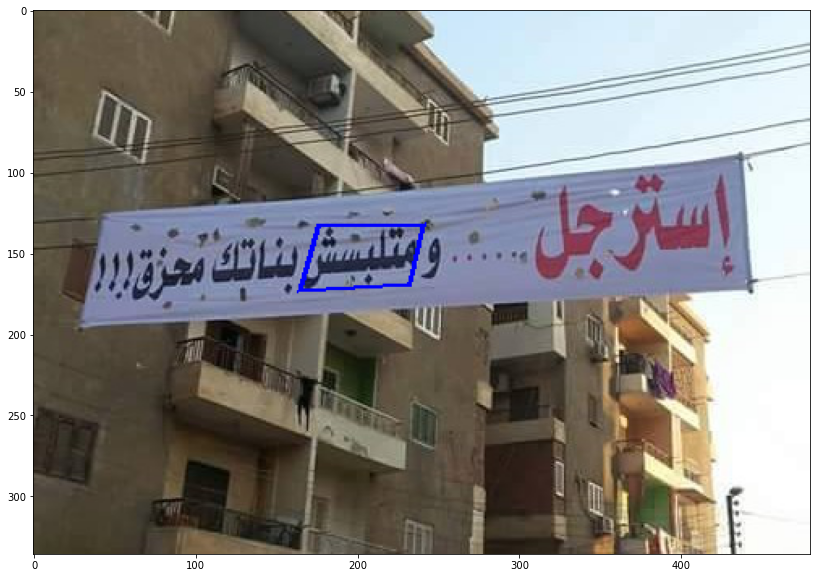

In [25]:
image = Image.open("dataset/IC17/train/img_100.jpg")
draw = ImageDraw.Draw(image)
w, h = image.width, image.height
plt.figure(figsize=(w // 32, h // 32))
draw.polygon(((c1, c2), (c3, c4), (c5, c6), (c7, c8)), outline=(0, 0, 255), width=3)
plt.imshow(np.array(image))
plt.show()

#### IC19
- gt구성 : c1, c2, c3, c4, c5, c6, c7, Language ,Text
- 라벨은 8개의 좌표로 구성됨
- (c1,c2) : 좌상단, (c3,c4) : 우상단, (c5,c6) : 우하단, (c7,c8) : 좌하단
- 라벨은 좌상단을 시작으로 시계방향으로 구성됨

In [26]:
with open("dataset/IC19/train_gt/tr_img_00100.txt", "r", encoding="utf-8-sig") as f:
    x = f.readlines()
    print(x)

['553,918,659,918,658,952,552,952,Arabic,الفصول\n', '453,908,541,910,541,951,454,949,Arabic,الأربعة\n', '378,957,462,958,464,1002,379,1001,Latin,LES\n', '483,962,511,961,511,1002,483,1003,Latin,4\n', '529,961,739,965,747,1012,529,1004,Latin,SAISONS\n']


In [27]:
c1, c2, c3, c4, c5, c6, c7, c8 = map(int, x[3].split(",")[:-2])

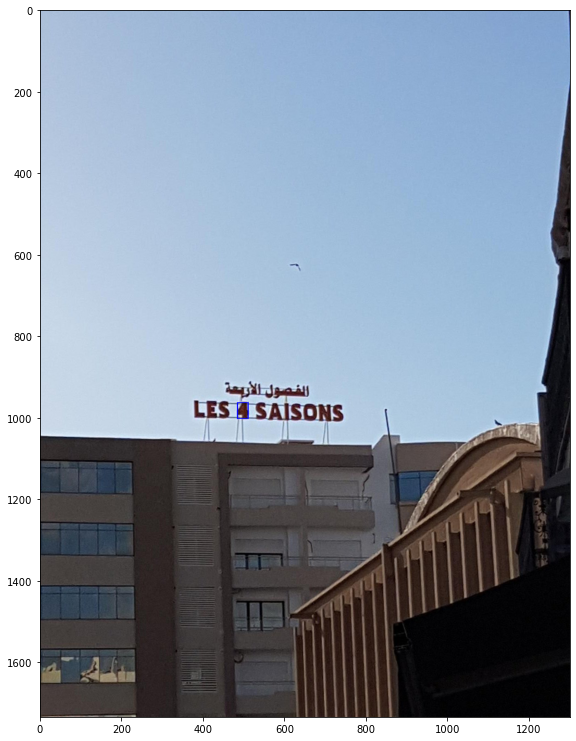

In [28]:
image = Image.open("dataset/IC19/train/tr_img_00100.jpg")
draw = ImageDraw.Draw(image)
draw.polygon(((c1, c2), (c3, c4), (c5, c6), (c7, c8)), outline=(0, 0, 255), width=3)
w, h = image.width, image.height
plt.figure(figsize=(w // 128, h // 128))
plt.imshow(np.array(image))
plt.show()

#### COCO
- mask : 좌표가 8개 이상
- bbox : (x, y, w, h)
- 데이터 확인 후 bbox 사용으로 결정

In [29]:
list(my_json["anns"].keys())[:5]

['45346', '153036', '125303', '21639', '112792']

In [30]:
my_json["anns"]["112792"]

{'mask': [489.4, 131.8, 502.7, 135.6, 502.7, 156.4, 493.1, 155.3],
 'class': 'machine printed',
 'bbox': [489.4, 131.8, 13.3, 24.6],
 'image_id': 379024,
 'id': 112792,
 'language': 'english',
 'area': 249.08,
 'utf8_string': 'W',
 'legibility': 'legible'}

In [31]:
my_json["imgs"]["379024"]

{'id': 379024,
 'set': 'train',
 'width': 640,
 'file_name': 'COCO_train2014_000000379024.jpg',
 'height': 480}

In [32]:
c1, c2, c3, c4, c5, c6, c7, c8 = my_json["anns"]["112792"]["mask"]
print(c1, c2, c3, c4, c5, c6, c7, c8)

489.4 131.8 502.7 135.6 502.7 156.4 493.1 155.3


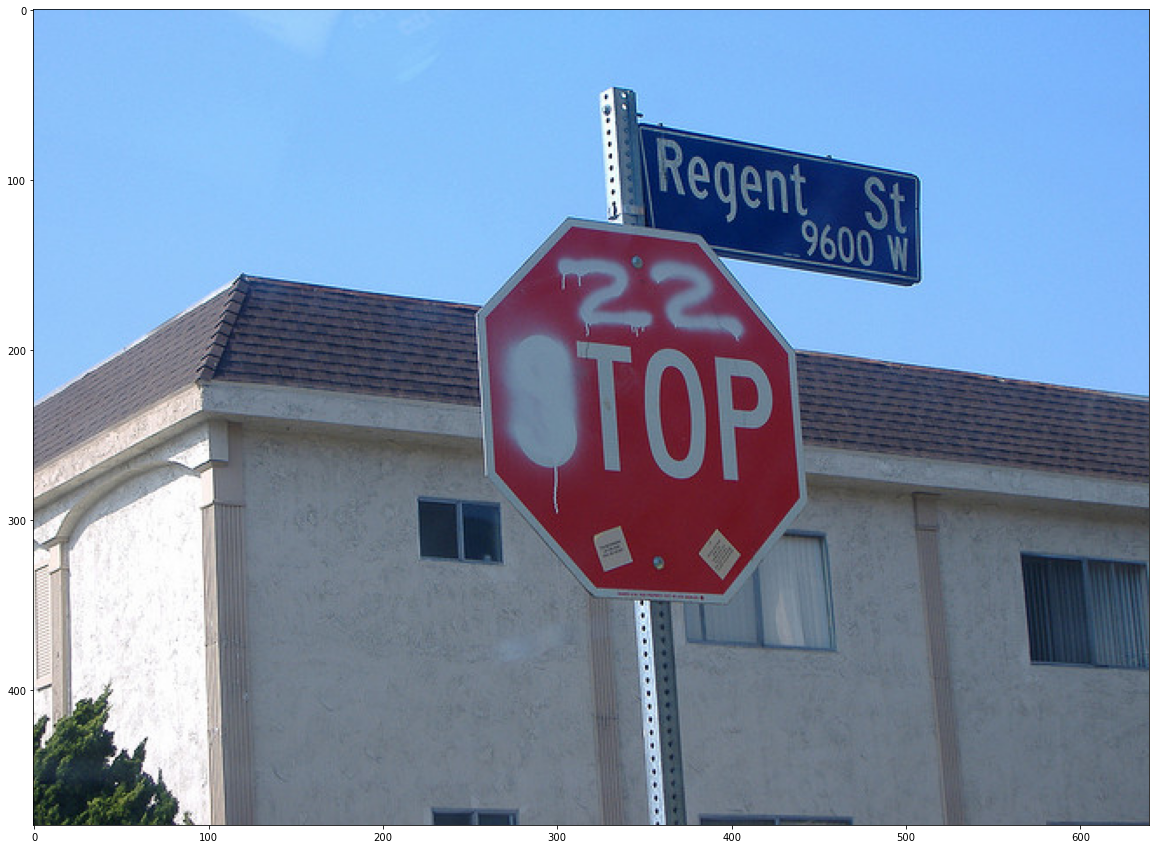

In [33]:
image = Image.open("dataset/COCO-Text/train2014/COCO_train2014_000000379024.jpg")
w, h = image.width, image.height
plt.figure(figsize=(w // 32, h // 32))
plt.imshow(np.array(image), aspect="auto")
plt.show()

##### mask 확인

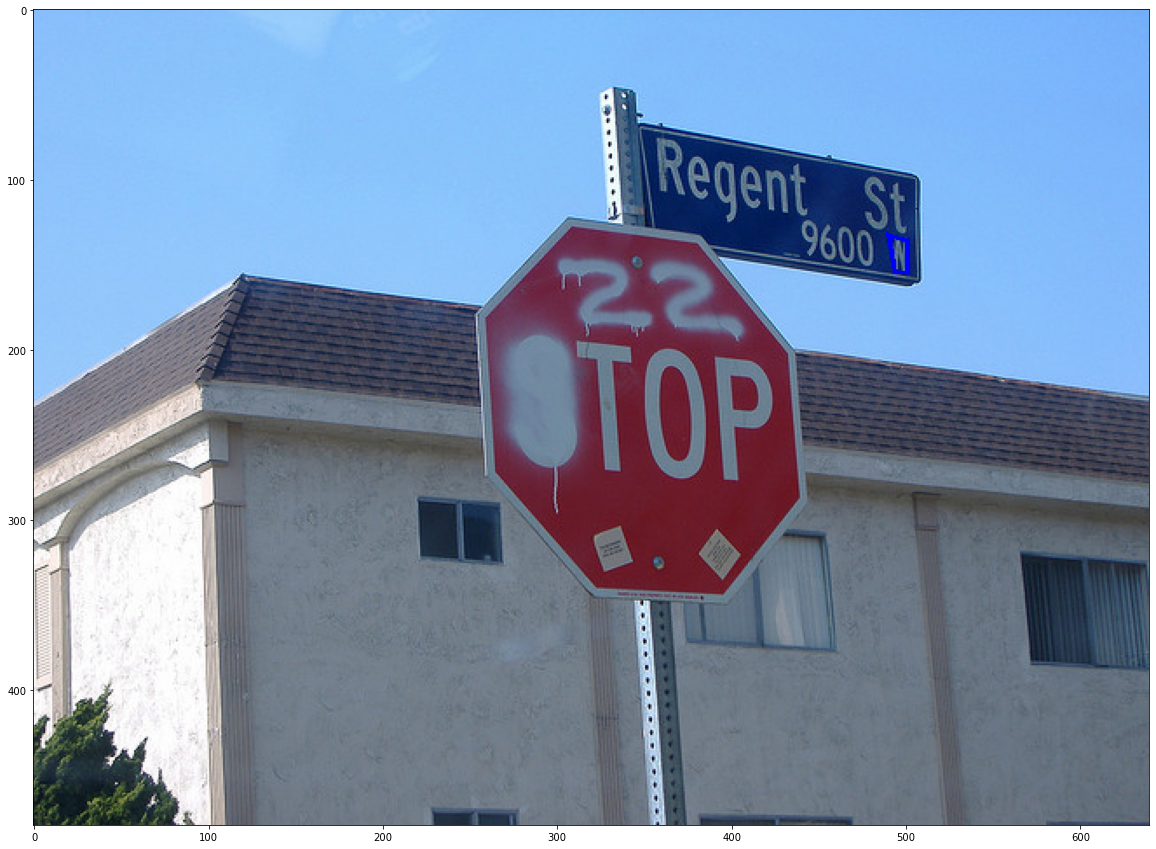

In [34]:
image = Image.open("dataset/COCO-Text/train2014/COCO_train2014_000000379024.jpg")
draw = ImageDraw.Draw(image)
draw.polygon(((c1, c2), (c7, c8), (c5, c6), (c3, c4)), outline=(0, 0, 255), width=3)
plt.figure(figsize=(w // 32, h // 32))
plt.imshow(np.array(image), aspect="auto")
plt.show()

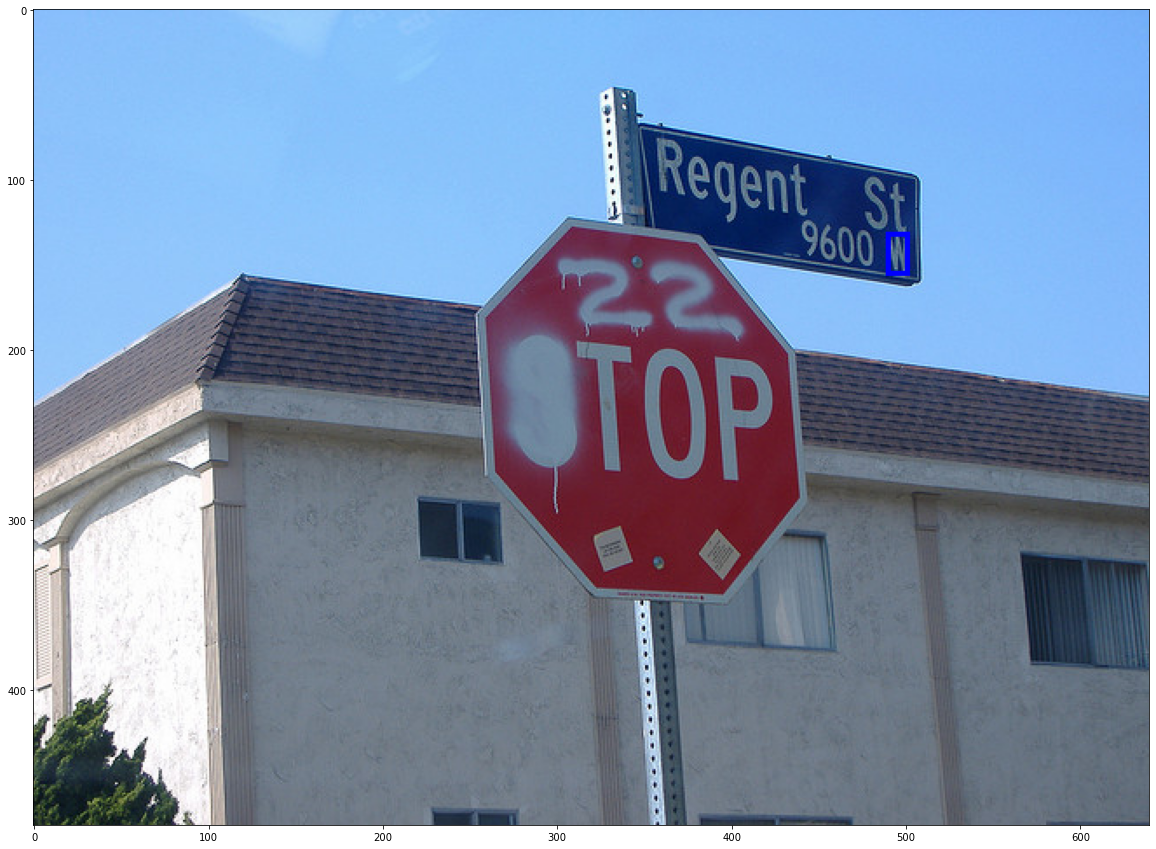

In [35]:
image = Image.open("dataset/COCO-Text/train2014/COCO_train2014_000000379024.jpg")
draw = ImageDraw.Draw(image)
draw.rectangle(((c1, c2), (c5, c6)), outline=(0, 0, 255), width=3)
plt.figure(figsize=(w // 32, h // 32))
plt.imshow(np.array(image), aspect="auto")
plt.show()

##### BBOX 확인

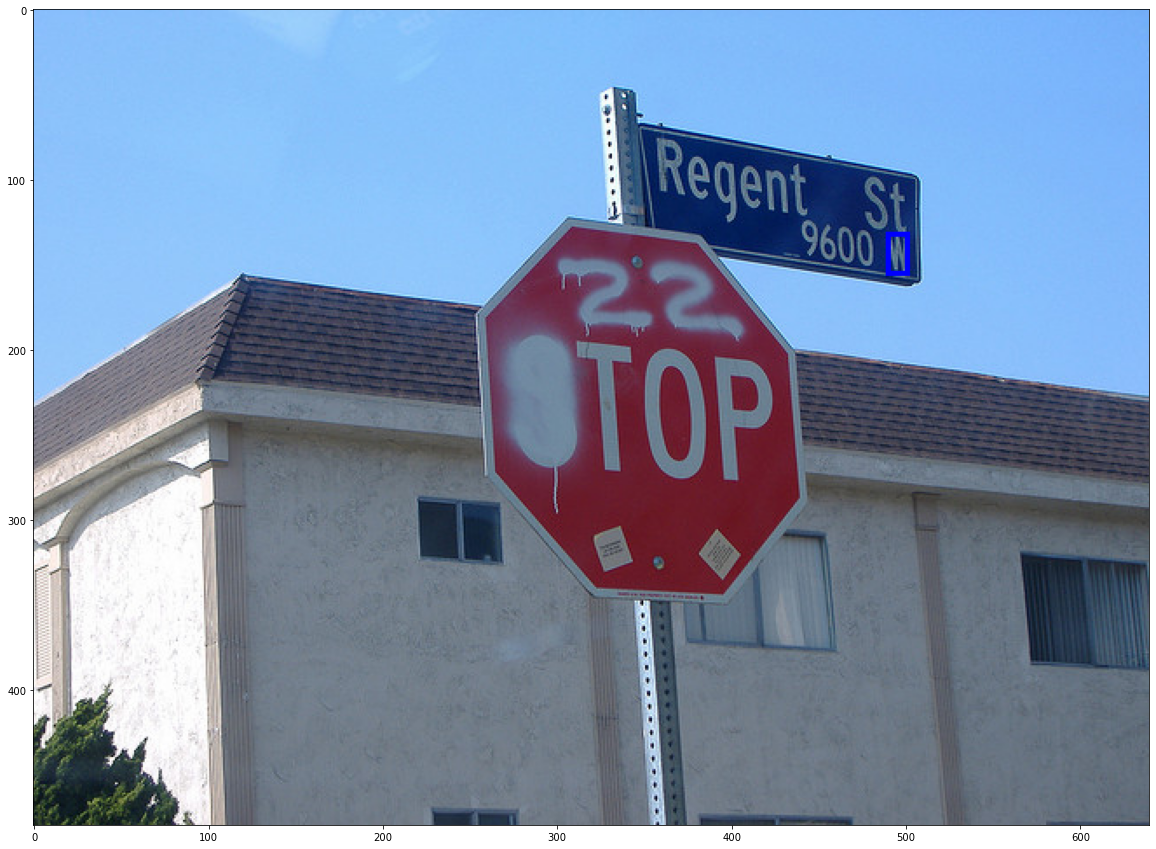

In [36]:
b1, b2, b3, b4 = my_json["anns"]["112792"]["bbox"]
image = Image.open("dataset/COCO-Text/train2014/COCO_train2014_000000379024.jpg")
draw = ImageDraw.Draw(image)
draw.rectangle(((b1, b2), (b1 + b3, b2 + b4)), outline=(0, 0, 255), width=3)
plt.figure(figsize=(w // 32, h // 32))
plt.imshow(np.array(image), aspect="auto")
plt.show()

##### 좌표가 9개 이상인 데이터 존재 확인

In [37]:
coords = []
for idx in my_json["imgToAnns"]["379024"]:
    coords.append(my_json["anns"][f"{idx}"]["mask"])
    print(my_json["anns"][f"{idx}"]["mask"])

[359.8, 107.3, 358.2, 75.8, 445.1, 91.8, 445.1, 122.8, 404.1, 113.7, 403.5, 126.5, 398.2, 126.5, 394.5, 113.2]
[440.9, 124.4, 441.4, 144.6, 483.0, 151.0, 482.5, 131.3]
[477.1, 126.5, 501.7, 132.9, 500.6, 101.4, 475.5, 96.6]
[489.4, 131.8, 502.7, 135.6, 502.7, 156.4, 493.1, 155.3]
[274.5, 190.5, 422.2, 206.5, 425.4, 230.5, 428.1, 280.6, 395.5, 276.9, 277.7, 267.8]
[299.4, 145.8, 310.2, 186.2, 410.2, 195.5, 410.2, 195.5, 388.0, 150.3]


##### 텍스트 형태에 따라 좌표 개수 상이

[(359.8, 107.3), (358.2, 75.8), (445.1, 91.8), (445.1, 122.8), (404.1, 113.7), (403.5, 126.5), (398.2, 126.5), (394.5, 113.2)]
[(440.9, 124.4), (441.4, 144.6), (483.0, 151.0), (482.5, 131.3)]
[(477.1, 126.5), (501.7, 132.9), (500.6, 101.4), (475.5, 96.6)]
[(489.4, 131.8), (502.7, 135.6), (502.7, 156.4), (493.1, 155.3)]
[(274.5, 190.5), (422.2, 206.5), (425.4, 230.5), (428.1, 280.6), (395.5, 276.9), (277.7, 267.8)]
[(299.4, 145.8), (310.2, 186.2), (410.2, 195.5), (410.2, 195.5), (388.0, 150.3)]


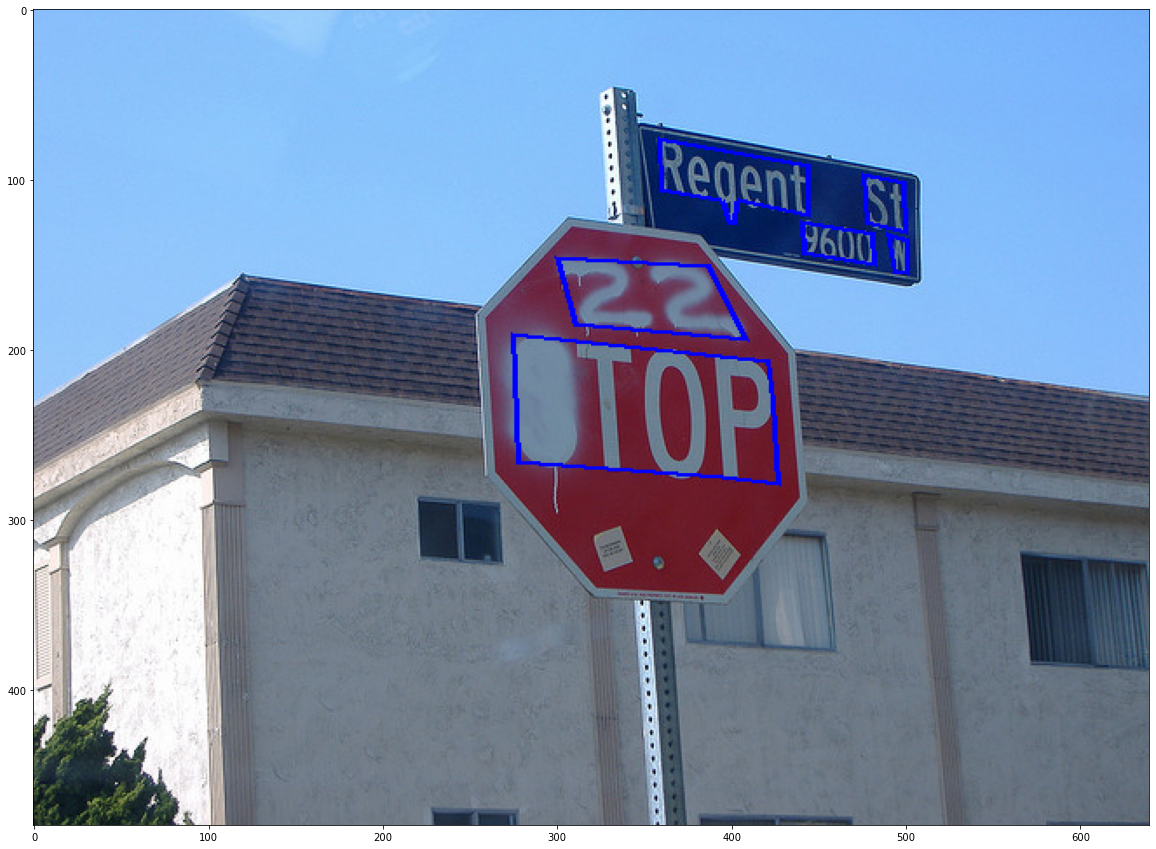

In [38]:
image = Image.open("dataset/COCO-Text/train2014/COCO_train2014_000000379024.jpg")
draw = ImageDraw.Draw(image)
for c in coords:
    temp = [tuple(c[i : i + 2]) for i in range(0, len(c), 2)]
    print(temp)
    draw.polygon(temp, outline=(0, 0, 255), width=3)
plt.figure(figsize=(w // 32, h // 32))
plt.imshow(np.array(image), aspect="auto")
plt.show()

##### 좌상단, 우하단을 좌표들의 최소, 최대로 구성

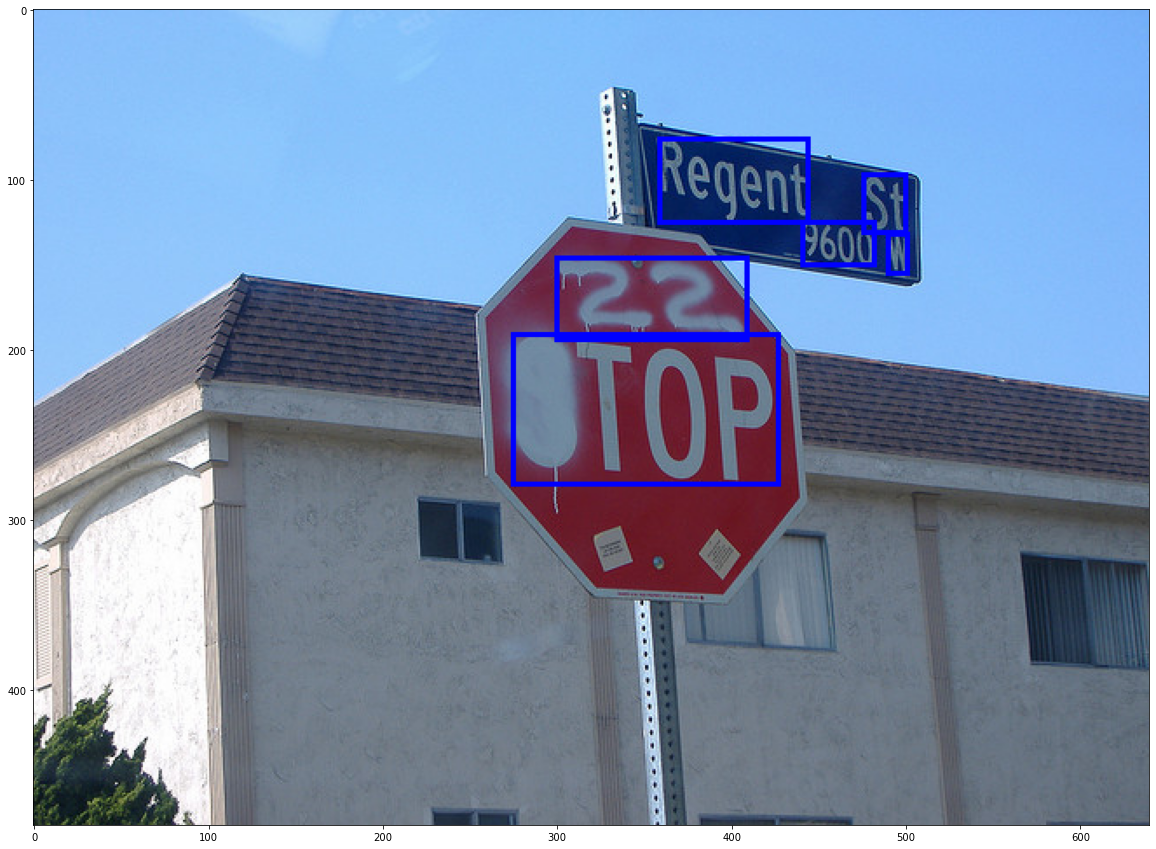

In [39]:
image = Image.open("dataset/COCO-Text/train2014/COCO_train2014_000000379024.jpg")
draw = ImageDraw.Draw(image)
for c in coords:
    xs = [c[i] for i in range(0, len(c), 2)]
    ys = [c[i] for i in range(1, len(c), 2)]
    x_min = min(xs)
    y_min = min(ys)
    x_max = max(xs)
    y_max = max(ys)

    draw.rectangle(((x_min, y_min), (x_max, y_max)), outline=(0, 0, 255), width=3)
plt.figure(figsize=(w // 32, h // 32))
plt.imshow(np.array(image), aspect="auto")
plt.show()

---
---

## 2. 데이터 준비
- IC13
    - gt 구성 : coords, text
    - 영어로만 구성됨

- IC15
    - gt 구성 : coords, text
    - illegible ( ### ) 처리해줘야 함
    - 좌표 변환
    - 영어로만 구성됨

- IC17
    - gt 구성 : coords, lan, text
    - illegible ( ### )
    - 좌표 변환
    - 언어 다양

- IC19
    - gt 구성 : coords, lan, text
    - illegible ( ### ) 처리해줘야 함
    - 좌표 변환
    - 언어 다양

- coco 
    - bbox 사용 (x, y, w , h)
    - illegible 처리해줘야 함
    - 영어로만 구성됨 

### (1) BBOX 변환 함수

In [40]:
def ic1517_to_mine(coords):
    """Convert IC15, IC17 coordinates to My Coordinates

    Args:
        coords (list): _description_

    Returns:
        tuple: Bounding Rectangle
    """
    # Convert IC15(IC17) coordinates to My coordinates
    xs = [int(coords[i]) for i in range(0, len(coords), 2)]  # even -> xs
    ys = [int(coords[i]) for i in range(1, len(coords), 2)]  # odd -> ys
    x_min, y_min = min(xs), min(ys)
    x_max, y_max = max(xs), max(ys)
    return ((x_min, y_min), (x_max, y_max))


def coco_to_mine(coords):
    """Convert COCO coordinates to My Coordinates

    Args:
        coords (list): _description_

    Returns:
        tuple: Bounding Rectangle
    """
    x, y, w, h = map(int, coords)
    return ((x, y), (x + w, y + h))

### (2) 라벨 전처리 함수 ( process_label )
- 좌표 변환
- illegible 처리

In [41]:
def read_label_IC(label_path, tag, lang):
    """Read label data from IC13, IC15, IC17, IC19

    Args:
        label_path (str): _description_
        tag (str): _description_
        lang (str): _description_

    Returns:
        list: list containing:
            tuple: (coords, text)
    """
    with open(label_path, "r", encoding="utf-8-sig") as f:
        label = f.readlines()
    if tag == "IC13":
        label = process_ic13_label(label)
    elif tag == "IC15":
        label = process_ic15_label(label)
    else:  # IC17, IC19
        label = process_ic1719_label(label, lang)
    return label

In [42]:
def process_ic13_label(label):
    """Process IC13 label data

    Coordinates are divided by ' '(white space)
    Consist of 4 numbers(top-left, bottom-right)

    Args:
        label (list): list of coordinates

    Returns:
        list: list containing:
            tuple: (coords, text)
    """
    new_label = []
    for l in label:
        info = l.split()
        coords = list(map(int, info[:4]))
        new_coords = ((coords[0], coords[1]), (coords[2], coords[3]))
        new_label.append((new_coords, info[-1][1:-1]))
    # (coords, text), (coords, text), ...
    return new_label


def process_ic15_label(label):
    """Process IC15 label data

    Coordinates are divided by ','
    Consist of 8 numbers(top-left, top-right, bottom-right, bottom-left)
    Args:
        label (list): _description_

    Returns:
        list: list containing:
            tuple: (coords, text)
    """
    new_label = []
    for l in label:
        info = l.split(",")
        if info[-1] != "###\n":
            coords = ic1517_to_mine(info[:8])
            new_label.append((coords, info[-1][:-1]))
    return new_label


def process_ic1719_label(label, lang):
    """Process IC17, IC19 label data

    Args:
        label (_type_): _description_
        lang (str): _description_

    Returns:
        list: list containing:
            tuple: (coords, text)
    """
    new_label = []
    for l in label:
        info = l.split(",")
        if info[-1] != "###\n" and info[8] in lang:
            coords = ic1517_to_mine(info[:8])
            new_label.append((coords, info[-1][:-1]))
    return new_label


def process_coco_label(label):
    """Process COCO-Text label data

    Coodinates are in a form of python list
    Consist of 4 numbers(left, top, width, height)

    Args:
        label (list): _description_

    Returns:
        list: list containing:
            tuple: (coords, text)
    """

    new_label = []
    for l in label:
        if l["legibility"] == "legible":
            bbox = l["bbox"]
            coords = coco_to_mine(bbox)
            text = l["utf8_string"]
            new_label.append((coords, text))
    return new_label

### (3) 이미지 자르는 함수

In [43]:
transform_pil = transforms.ToPILImage()
transform_tensor = transforms.ToTensor()


def crop_image(img, labels):
    """Crop the image to size 128x32"""
    boxes = []
    img = transform_pil(img)
    for label in labels:
        img_orig = img.copy()
        coords, text = label
        img_crop = img_orig.crop(
            (coords[0][0], coords[0][1], coords[1][0], coords[1][1])
        )
        img_resize = img_crop.resize((128, 32))
        img_tensor = transform_tensor(img_resize)
        boxes.append((img_tensor, text))
    return boxes

### (4) 구멍낸 REAL IMAGE 생성 함수

In [44]:
def cut_out(img, length=42):
    h = img.size(1)
    w = img.size(2)
    x = np.random.randint(w)

    x1 = np.clip(x - length // 2, 0, w)
    x2 = np.clip(x + length // 2, 0, w)

    mask = np.ones((h, w), np.float32)
    mask[0:h, x1:x2] = 0.0
    mask = torch.from_numpy(mask)
    mask = mask.expand_as(img)
    img = img * mask
    return img

---
---

## 3. Save Cropped Images

In [45]:
transform_pil = transforms.ToPILImage()

def save_ic_data(img_dir, label_dir, tag="IC13", lang=["Latin"]):
    img_path_list = sorted(glob.glob(img_dir + "/*"))
    label_path_list = sorted(glob.glob(label_dir + "/*"))
    idx = 0

    for img_path, label_path in tqdm(
        zip(img_path_list, label_path_list),
        total=len(label_path_list),
    ):
        label = read_label_IC(label_path, tag, lang)
        if label:
            try:
                image = read_image(img_path,mode=ImageReadMode.RGB)
            except:
                pass
            boxes = crop_image(image, label)
            for box in boxes:
                img_cropped = transform_pil(box[0])
                if os.path.exists(f"dataset/cropped/{tag}_{idx}.jpg"):
                    continue
                img_cropped.save(f"dataset/cropped/{tag}_{idx}.jpg")
                idx += 1
                
                
def save_coco_data(json_path):
    with open(json_path) as f:
        my_json = json.load(f)
        
    new_indices = [k for k, v in my_json["imgToAnns"].items() if v]
    idx = 0
    
    for index in tqdm(new_indices):
        img_path = my_json["imgs"][f"{index}"]["file_name"]
        image = read_image(
            os.path.join("dataset/COCO-Text/train2014", img_path),
            mode=ImageReadMode.RGB,
        )

        anns = [
            my_json["anns"][f"{x}"]
            for x in my_json["imgToAnns"][f"{index}"]
        ]
        label = process_coco_label(anns)
        boxes = crop_image(image, label)
        for box in boxes:
            img_cropped = transform_pil(box[0])
            if os.path.exists(f"dataset/cropped/coco_{idx}.jpg"):
                continue
            img_cropped.save(f"dataset/cropped/coco_{idx}.jpg")
            idx += 1

In [46]:
save_ic_data("dataset/IC13/train", "dataset/IC13/train_gt", "IC13")
save_ic_data("dataset/IC15/train", "dataset/IC15/train_gt", "IC15")
save_ic_data("dataset/IC17/train", "dataset/IC17/train_gt", "IC17")
save_ic_data("dataset/IC19/train", "dataset/IC19/train_gt", "IC19")

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [17:44<00:00,  9.39it/s]


In [47]:
save_coco_data("dataset/COCO-Text/label/cocotext.v2.json")

100%|██████████████████████████████████████████████████████████████████████████| 23485/23485 [03:51<00:00, 101.54it/s]


## 4. DataLoad

### (1) ICDataset

In [48]:
class ICDataset(Dataset):
    """Dataset for IC13, IC15, IC17, IC19

    Args:
        Dataset (_type_): _description_
    """

    def __init__(self, img_dir, transform=None, tag="IC13"):
        self.box_path_list = glob.glob(img_dir + f"/{tag}_*.jpg")[::3]
        self.transform = transform

    def __len__(self):
        return len(self.box_path_list)

    def __getitem__(self, idx):
        image = read_image(self.box_path_list[idx]) / 255.0
        image_cut = cut_out(image)
        if self.transform:
            image = self.transform(image)
            image_cut = self.transform(image_cut)
        return image_cut, image

### (2) COCODataset

In [49]:
class COCODataset(Dataset):
    """Dataset for COCO-Text

    Args:
        Dataset (_type_): _description_
    """

    def __init__(self, img_dir, transform=None):
        self.box_path_list = glob.glob(img_dir + f"/coco_*.jpg")[::3]
        self.transform = transform

    def __len__(self):
        return len(self.box_path_list)

    def __getitem__(self, idx):
        image = read_image(self.box_path_list[idx]) / 255.0
        image_cut = cut_out(image)
        if self.transform:
            image = self.transform(image)
            image_cut = self.transform(image_cut)
        return image_cut, image

### (3) Statistics for Normalize

#### total dataset

In [50]:
ic13_dataset = ICDataset("dataset/cropped", tag="IC13")
ic15_dataset = ICDataset("dataset/cropped", tag="IC15")
ic17_dataset = ICDataset("dataset/cropped", tag="IC17")
ic19_dataset = ICDataset("dataset/cropped", tag="IC19")
coco_dataset = COCODataset(img_dir="dataset/cropped")
real_dataset = torch.utils.data.ConcatDataset(
    [ic13_dataset, ic15_dataset, ic17_dataset, ic19_dataset, coco_dataset]
)

In [51]:
def get_stat_real(dataset):
    loader = DataLoader(dataset, batch_size=len(dataset))
    data = next(iter(loader))
    inputs = data[1]

    mean = [0] * 3
    std = [0] * 3

    for i in range(3):
        mean[i] = torch.mean(inputs[:, i, :, :])
        std[i] = torch.std(inputs[:, i, :, :])
    return mean, std


mean, std = get_stat_real(real_dataset)
print(mean, std)

[tensor(0.5078), tensor(0.4828), tensor(0.4673)] [tensor(0.2715), tensor(0.2627), tensor(0.2713)]


In [52]:
ic13_dataset = ICDataset("dataset/cropped", tag="IC13", transform=transforms.Normalize(mean, std))
ic15_dataset = ICDataset("dataset/cropped", tag="IC15", transform=transforms.Normalize(mean, std))
ic17_dataset = ICDataset("dataset/cropped", tag="IC17", transform=transforms.Normalize(mean, std))
ic19_dataset = ICDataset("dataset/cropped", tag="IC19", transform=transforms.Normalize(mean, std))
coco_dataset = COCODataset(img_dir="dataset/cropped", transform=transforms.Normalize(mean, std))

In [53]:
real_dataset = torch.utils.data.ConcatDataset(
    [ic13_dataset, ic15_dataset, ic17_dataset, ic19_dataset, coco_dataset]
)
torch.save(real_dataset, "dataset/real_dataset.pt")
print(len(real_dataset))

64156


### 테스트용 이미지 저장

In [54]:
def process_ic13_label_test(label):
    new_label = []
    for l in label:
        info = l.split(",")
        coords = list(map(int, info[:4]))
        new_coords = ((coords[0], coords[1]), (coords[2], coords[3]))
        new_label.append((new_coords, info[-1][1:-1]))
    # (coords, text), (coords, text), ...
    return new_label

In [55]:
def read_label_IC(label_path, tag, lang):
    """Process label data of IC"""
    with open(label_path, "r", encoding="utf-8-sig") as f:
        label = f.readlines()
    if tag == "IC13":
        label = process_ic13_label(label)
    elif tag == "IC13T":
        label = process_ic13_label_test(label)
    elif tag == "IC15":
        label = process_ic15_label(label)
    else:  # IC17, IC19
        label = process_ic1719_label(label, lang)
    return label

In [56]:
def save_ic_data(img_dir, label_dir, tag="IC13", lang=["Latin"]):
    img_path_list = sorted(glob.glob(img_dir + "/*"))
    label_path_list = sorted(glob.glob(label_dir + "/*"))
    idx = 0

    for img_path, label_path in tqdm(
        zip(img_path_list, label_path_list),
        total=len(label_path_list),
    ):
        label = read_label_IC(label_path, tag, lang)
        if label:
            try:
                image = read_image(img_path,mode=ImageReadMode.RGB)
            except:
                pass
            boxes = crop_image(image, label)
            for box in boxes:
                img_cropped = transform_pil(box[0])
                if os.path.exists(f"dataset/cropped/{tag}_{idx}.jpg"):
                    continue
                img_cropped.save(f"dataset/cropped/{tag}_{idx}.jpg")
                idx += 1

In [58]:
save_ic_data("dataset/IC13/test", "dataset/IC13/test_gt", tag="IC13T")
save_ic_data("dataset/IC15/test", "dataset/IC15/test_gt", tag="IC15")

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:08<00:00, 61.61it/s]


In [59]:
ic13_dataset = ICDataset(
    "dataset/cropped_test", tag="IC13", transform=transforms.Normalize(mean, std)
)
ic15_dataset = ICDataset(
    "dataset/cropped_test", tag="IC15", transform=transforms.Normalize(mean, std)
)

In [61]:
torch.save(ic13_dataset, "dataset/ic13_test.pt")
torch.save(ic15_dataset, "dataset/ic15_test.pt")